# Integral

alternative way to calculate area

**Symbolic**

In [1]:
import sympy as sy

In [2]:
x = sy.Symbol('x', real=True)
f = 2*x**2 + 4*x - 1

In [4]:
f

2*x**2 + 4*x - 1

In [3]:
sy.integrate(f)

2*x**3/3 + 2*x**2 - x

the constant C is not included here

**Numeric**

In [6]:
from scipy import integrate

In [7]:
def f(x):
    return 2*x**2 + 4*x - 1

In [10]:
A = integrate.quad(f, 2, 5) # 2, 5 adalah range x atau batas atas/bawah
print(A)

(117.0, 1.2989609388114332e-12)


**Numeric - Data/Array**

In [11]:
from scipy import integrate
import numpy as np
def f(x):
    return 2*x**2 + 4*x - 1

x = np.linspace(2, 5)   # ini adalah nilai batas atas dan bawah
y = f(x)

A = integrate.trapz(y, x)  # trapz atau trapezoid
print(A)

117.00374843815077


numerik cuma bisa untuk definite integral

## Case

Hitung total pendapatan tahun 2019 di supermarket cabang Yangon

note: bisa aja cukup pake sum() tapi ini pakai integral untuk belajar

In [12]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/ds-masterclass-h8-vol2/main/data/supermarket_sales%20-%20Sheet1.csv')
data = data[data['City']=='Yangon'].sort_values(['Date','Time']).reset_index(drop=True) # drop=True untuk drop index yang lama
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
1,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7
2,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,1/1/2019,14:42,Credit card,742.20,4.761905,37.110,4.3
3,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
4,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,1/1/2019,20:26,Ewallet,108.16,4.761905,5.408,6.9


In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/ds-masterclass-h8-vol2/main/data/supermarket_sales%20-%20Sheet1.csv')
data[data['City']=='Yangon'].sort_values(['Date','Time'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7
829,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,1/1/2019,14:42,Credit card,742.20,4.761905,37.110,4.3
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,1/1/2019,20:26,Ewallet,108.16,4.761905,5.408,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,308-47-4913,A,Yangon,Member,Female,Sports and travel,52.26,10,26.130,548.730,3/9/2019,12:45,Credit card,522.60,4.761905,26.130,6.2
755,652-43-6591,A,Yangon,Normal,Female,Fashion accessories,97.29,8,38.916,817.236,3/9/2019,13:18,Credit card,778.32,4.761905,38.916,6.2
585,127-47-6963,A,Yangon,Normal,Male,Health and beauty,51.71,4,10.342,217.182,3/9/2019,13:53,Credit card,206.84,4.761905,10.342,9.8
234,157-13-5295,A,Yangon,Member,Male,Health and beauty,51.94,10,25.970,545.370,3/9/2019,18:24,Ewallet,519.40,4.761905,25.970,6.5


<AxesSubplot:>

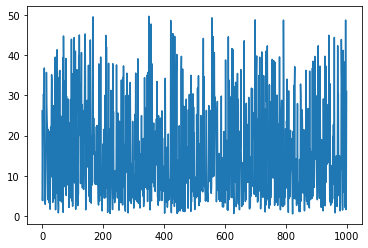

In [14]:
data['gross income'].plot(kind='line')

In [15]:
x = data.index
y = data['gross income']

total_gross_income_2019 = integrate.trapz(y,x)
print('Total Gross Income in 2019:',total_gross_income_2019)

Total Gross Income in 2019: 15350.838749999999


cek kalo pake .sum():

In [16]:
data['gross income'].sum()

15379.368999999999

ternyata ada sedikit perbedaan!

### **Luas Area Lingkaran**

In [17]:
from scipy.integrate import trapz
import numpy as np

R=30  # radius of the circle
x=np.linspace(-R,R,200)

# potong lingkaran jadi 2, atas dan bawah
upper = np.sqrt(R**2 - x**2)
lower = -upper

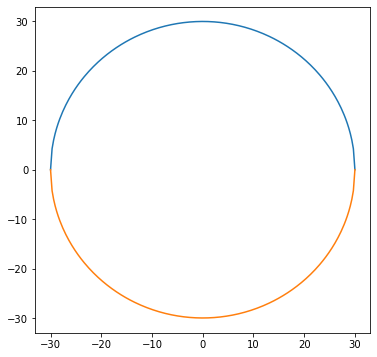

In [18]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(x,upper)
ax.plot(x,lower)

In [19]:
area = trapz(upper,x) - trapz(lower,x)

print(area)

2826.367344907366


cek dengan rumus luas lingkaran:

In [20]:
print(np.pi*R**2)

2827.4333882308138


ternyata ada perbedaan lagi walaupun kecil.

kalau 200 kita ganti dengan nominal yang lebih besar, maka perbedaan ini akan semakin kecil

# coba NGC integral